In [1]:
import os
os.chdir("..")

In [3]:
import json
from collections import Counter
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
import string
from os import listdir
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords as get_stopwords
from nltk.tokenize import word_tokenize
from classes.constants import *
from classes.claim import Claim
from util.claim_util import *
from util.nlp_util import *
from util.evaluate_util import *
from util.wiki_util import *
from typing import List
from random import sample
from util.google_search_util import google_the_claim
import random
import matplotlib.pyplot as plt

In [4]:
train = load_claims_train()

In [5]:
train_no_nei = [t for t in train if t.label != Claim.NEI]

In [6]:
t = train_no_nei[0]

In [7]:
t

SUPPORTS: Nikolaj Coster-Waldau worked with the Fox Broadcasting Company.

In [8]:
random.seed(42)

In [9]:
train_subset = sample(train_no_nei, 100)

In [11]:
Counter([t.label for t in train_subset])

Counter({'SUPPORTS': 74, 'REFUTES': 26})

In [12]:
wiki_titles = load_wikipedia_titles() 

In [13]:
c = train[0]

In [14]:
c

SUPPORTS: Nikolaj Coster-Waldau worked with the Fox Broadcasting Company.

In [15]:
claim = c.claim

In [16]:
claim

'Nikolaj Coster-Waldau worked with the Fox Broadcasting Company.'

In [17]:
result, document_result = evaluate_documents_sample(train_subset, wiki_titles)

NameError: name 'evaluate_documents_sample' is not defined

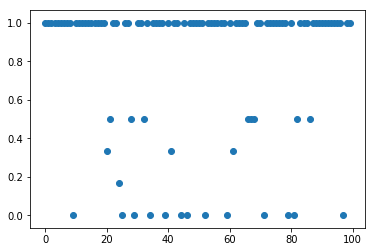

In [24]:
plt.scatter([range(0, 100)], [d['recall'] for d in document_result])

In [36]:
retrieve_documents(train_subset[9].claim, wiki_titles)

{'G'}

In [35]:
[(i,d['recall'], train_subset[i], train_subset[i].all_evidence_documents()) for i, d in enumerate(document_result) if d['recall'] < 1.0]

[(9, 0.0, SUPPORTS: Gray wolves will eat garbage., {'Gray_wolf'}),
 (20,
  0.3333333333333333,
  REFUTES: Vanilla Sky stars only actors and actresses with no middle names.,
  {'Jason_Lee_(actor)', 'Kurt_Russell', 'Vanilla_Sky'}),
 (21,
  0.5,
  REFUTES: Harry Potter was written by an Englishman.,
  {'Harry_Potter', 'J._K._Rowling'}),
 (24,
  0.16666666666666666,
  SUPPORTS: Kurt Angle is a professional wrestling champion.,
  {'Kurt_Angle',
   'Triple_Crown_(professional_wrestling)',
   'WWE_Championship',
   'WWE_European_Championship',
   'WWE_Intercontinental_Championship',
   'World_Heavyweight_Championship_(WWE)'}),
 (25,
  0.0,
  SUPPORTS: Homeland was developed by Alex Gansa.,
  {'Homeland_(TV_series)'}),
 (28,
  0.5,
  SUPPORTS: Seven Days in May was directed by a person.,
  {'John_Frankenheimer', 'Seven_Days_in_May'}),
 (29,
  0.0,
  SUPPORTS: An American actor starred in The Host.,
  {'Jake_Abel', 'The_Host_(2013_film)', 'William_Hurt'}),
 (32,
  0.5,
  REFUTES: Steve Mouzakis

In [18]:
def evaluate_documents_sample(train_subset: List[Claim], wiki_titles):
    documents : List[set] = []
    for claim in tqdm(train_subset):
        documents.append(convert_wikipedia_titles_to_ids(retrieve_documents(claim.claim, wiki_titles)))
    return evaluate_documents_retrieval_full([c.evidence_document_sets() for c in train_subset], documents, verbose=True)

SUPPORTS: Nikolaj Coster-Waldau worked with the Fox Broadcasting Company.

In [16]:
def retrieve_documents(claim: str, wiki_titles: List[str]) -> set:
    documents = set()
    for title in wiki_titles:
        if title in claim:
            documents.add(title)
    return documents

In [39]:
def retrieve_documents(claim: str, wiki_titles: List[str]) -> set:
    documents = set()
    stopwords = get_stopwords.words("english")
    claim_entities = tokenize(get_entities(claim), stopwords)
    for title in tqdm(wiki_titles):
        if tokenize([title], stopwords)[0] in claim_entities:
            documents.add(title)
    return documents

In [18]:
def retrieve_documents(claim: str, wiki_titles: List[str]) -> set:
    top_4 = google_the_claim(claim, limit_to_wiki=True)[:4]
    return set(top_4)

In [17]:
def retrieve_documents(claim: str, wiki_titles: List[str]) -> set:
    print(claim)
    top_4 = google_the_claim(claim, verbose=True)
    return set(top_4)

In [21]:
google_the_claim("Mick Jagger")

[]

In [18]:
retrieve_documents(claim, wiki_titles)

Nikolaj Coster-Waldau worked with the Fox Broadcasting Company.


set()

In [21]:
evaluate_documents_sample(train_subset, wiki_titles)

100%|██████████| 100/100 [02:19<00:00,  1.46s/it]


{'average_precision': 0.0,
 'average_recall': 0.0,
 'average_f1_score': 0.0,
 'average_f2_score': 0.0,
 'oracle_accuracy': 0.0}

In [19]:
evaluate_documents_sample(train_subset, wiki_titles)

100%|██████████| 100/100 [02:26<00:00,  1.28s/it]


{'average_precision': 0.235,
 'average_recall': 0.7515,
 'average_f1_score': 0.3405158730158726,
 'average_f2_score': 0.497013888888889,
 'oracle_accuracy': 0.76}

In [45]:
stopwords = get_stopwords.words("english")

In [76]:
c = train[3]

In [77]:
c.claim

'Adrienne Bailon is an accountant.'

In [78]:
get_entities(c.claim)

{'Adrienne Bailon'}

In [79]:
c.all_evidence_documents()

{'Adrienne_Bailon'}

In [81]:
[(t.claim, t.all_evidence_documents(), get_entities(t.claim)) for t in train_subset]

[('Everton F.C. played at Wembley Stadium.',
  {'1995_FA_Cup_Final', 'Everton_F.C.'},
  {'Everton F.C.', 'Wembley Stadium'}),
 ('Dr. Dre established his own country.', {'Dr._Dre'}, {'Dre'}),
 ('Seiko has only ever sold machines.', {'Seiko'}, set()),
 ('Calvin Harris is a person with at least one vocation.',
  {'Calvin_Harris'},
  {'Calvin Harris', 'at least one'}),
 ('Night Attack at Târgovişte was fought on a Monday.',
  {'Night_Attack_at_Târgovişte'},
  {'Monday', 'Night Attack', 'Târgovişte'}),
 ('Russell Crowe portrayed Maximus Decimus Meridius, a Roman General.',
  {'Russell_Crowe'},
  {'Maximus Decimus Meridius', 'Roman', 'Russell Crowe'}),
 ('The Lion King was only released in 1345.',
  {"Disney's_Hollywood_Studios",
   'Disney_Renaissance',
   'Don_Hahn',
   'Elton_John',
   'George_Scribner',
   'Hamlet',
   'Jeffrey_Katzenberg',
   'List_of_Walt_Disney_Animation_Studios_films',
   'Matthew_Broderick',
   'Pocahontas_(1995_film)',
   'Simba',
   'The_Lion_King',
   'The_

In [12]:
documents = retrieve_documents(claim, wiki_titles)

NameError: name 'claim' is not defined

In [41]:
documents

{'Fox Broadcasting Company', 'Nikolaj Coster-Waldau'}

In [42]:
evaluate_document_retrieval_full(c.evidence_document_sets(), convert_wikipedia_titles_to_ids(documents))

{'precision': 1.0,
 'recall': 1.0,
 'f1_score': 1.0,
 'f2_score': 1.0,
 'true_positives': 2,
 'false_positives': 0,
 'false_negatives': 0,
 'oracle_accuracy': 1}

In [24]:
evaluate_documents_sample(train_subset, wiki_titles)

100%|██████████| 100/100 [02:04<00:00,  1.25s/it]


{'average_precision': 0.08449472926139479,
 'average_recall': 0.7242811355311355,
 'average_f1_score': 0.1424154258955716,
 'average_f2_score': 0.25717014456216886,
 'oracle_accuracy': 0.77}